In [ ]:
!pip install -q kaggle #installing kaggle and obtaining kaggle datasets

In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"justinmr","key":"cb2f5b5f39647cd131a849d3e00c9857"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            408        417  0.9375           
datasets/piterfm/2022-ukraine-russian-war                                      2022 Ukraine Russia War                            2KB  2022-04-27 08:05:38          11945        651  1.0              
datasets/muhmores/spotify-top-100-songs-of-20152019                            Spotify Top 100 Songs of 2010-2019               139KB  2022-04-09 06:35:36           2141         49  0.8235294        


In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database #obtaining the diabetes dataset to perform linear regression with

pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip pima-indians-diabetes-database.zip #unzipping the downloaded dataset

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [ ]:
import numpy as np #importing libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv(r'/content/diabetes.csv') #read in the dataset on diabetes as a dataframe

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
title_list = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
for i in title_list:# Imputing missing data in for relevant features
    df[i] = df[i].replace(0, np.nan).fillna(df[i].mean())

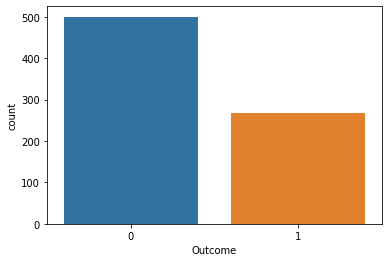

In [ ]:
sns.countplot(x='Outcome',data=df) #demonstrates the count of no diabetes (0) vs the count of those having diabetes (1)
plt.show()

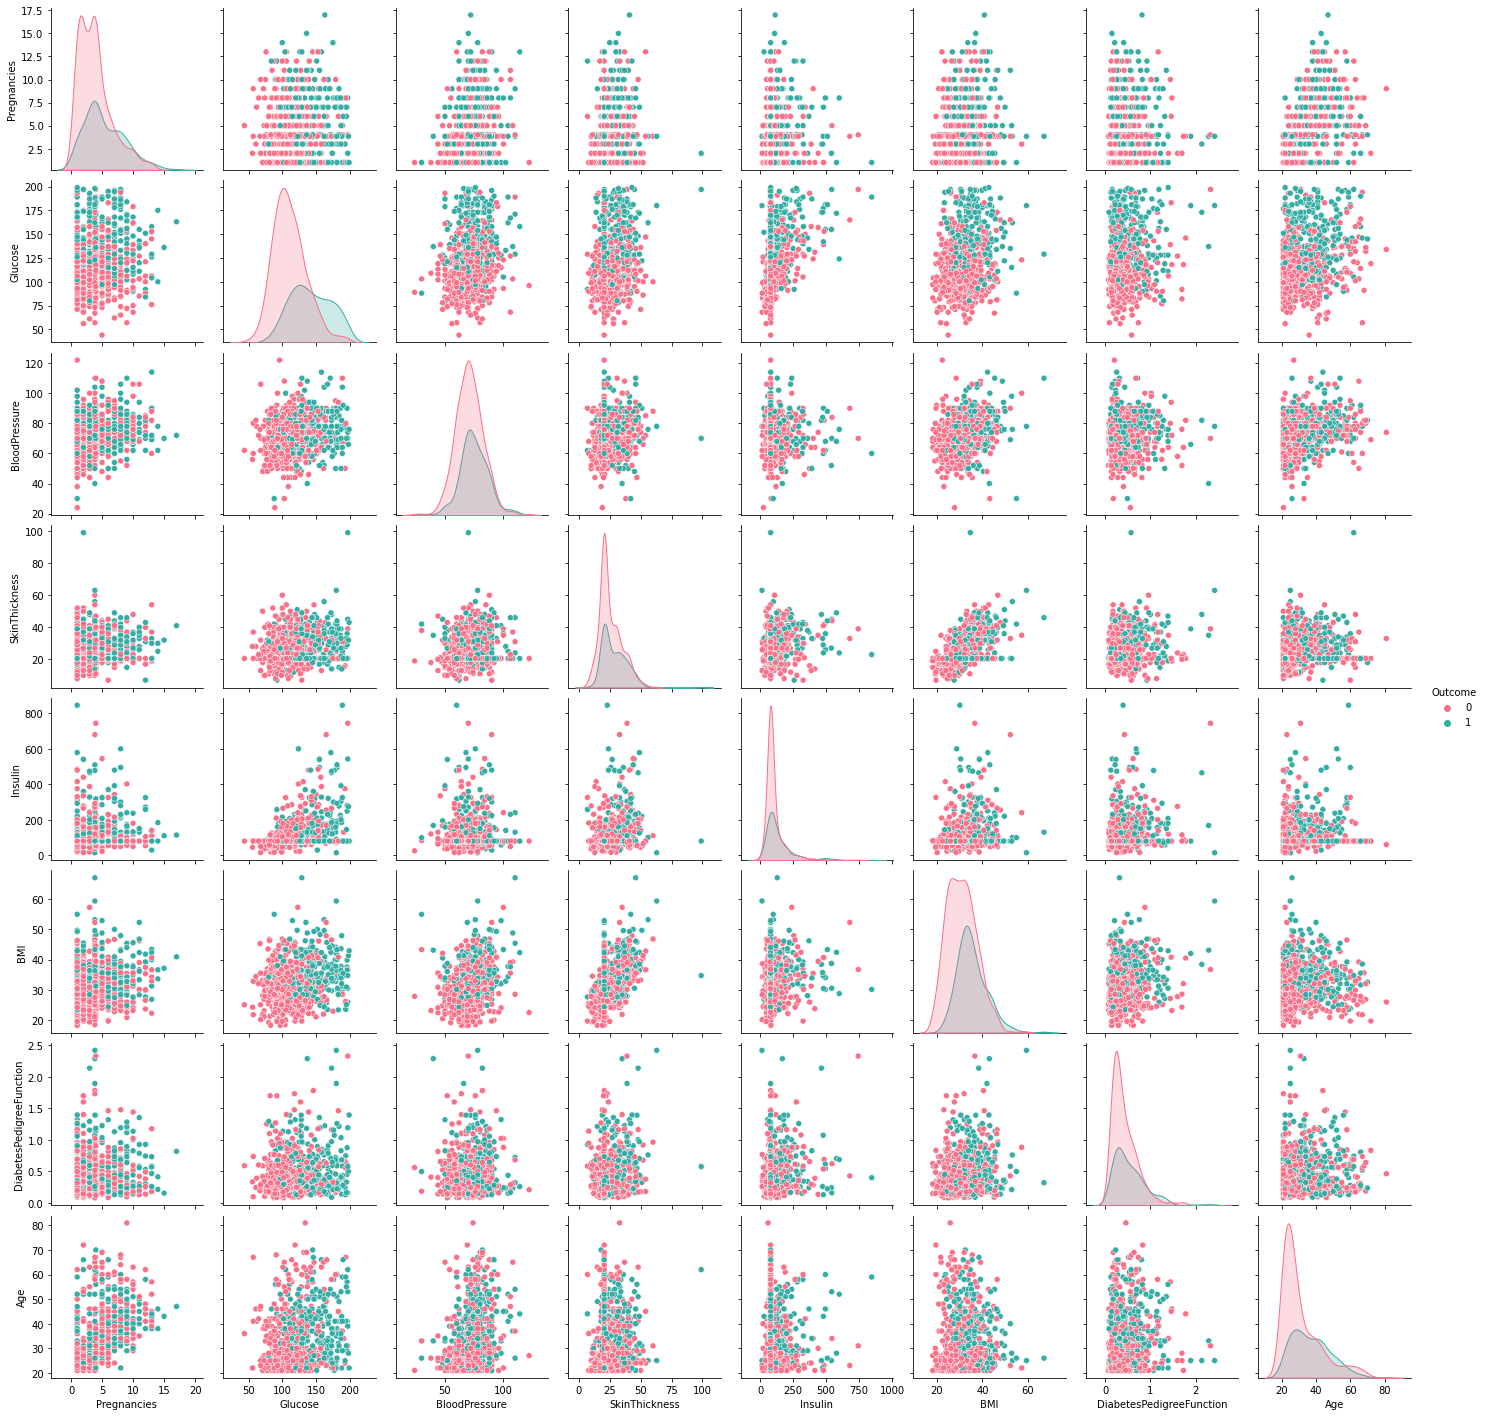

In [ ]:
#DISTRIBUTIONS OF EACH FEATURE
g = sns.pairplot(df, hue="Outcome", palette="husl")

In [ ]:
df.drop("Outcome", axis=1, inplace=True)


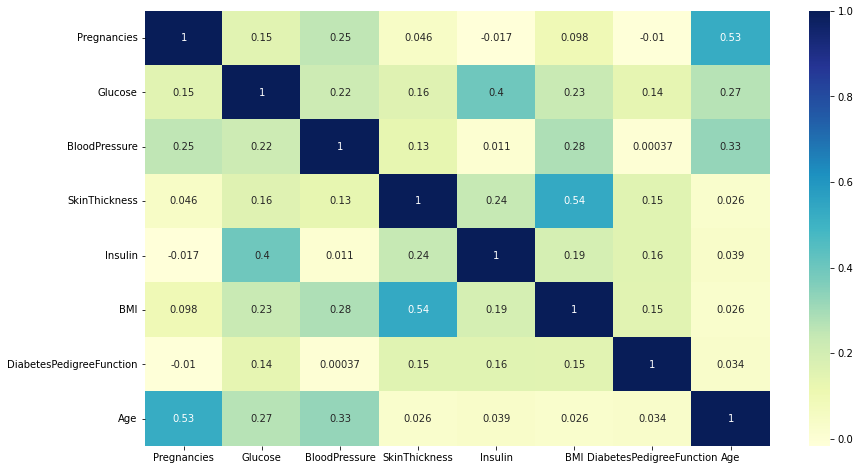

In [ ]:
# Heat map helps us to draw correlations between features 
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

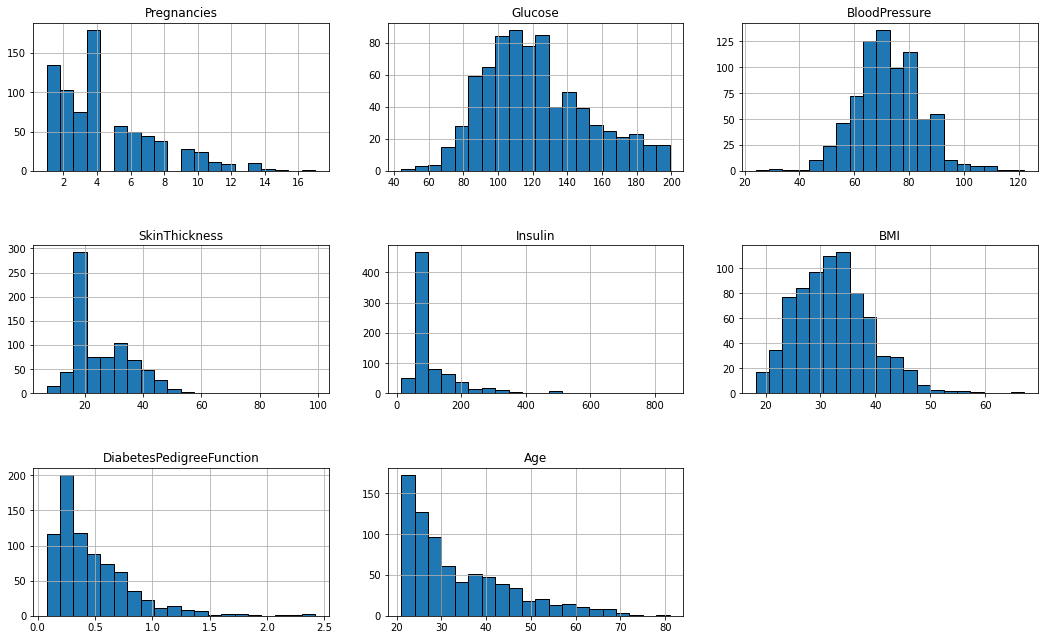

In [ ]:
import itertools

columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns) #plots the output as a histogram
for i,j in itertools.zip_longest(columns,range(length)): #
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

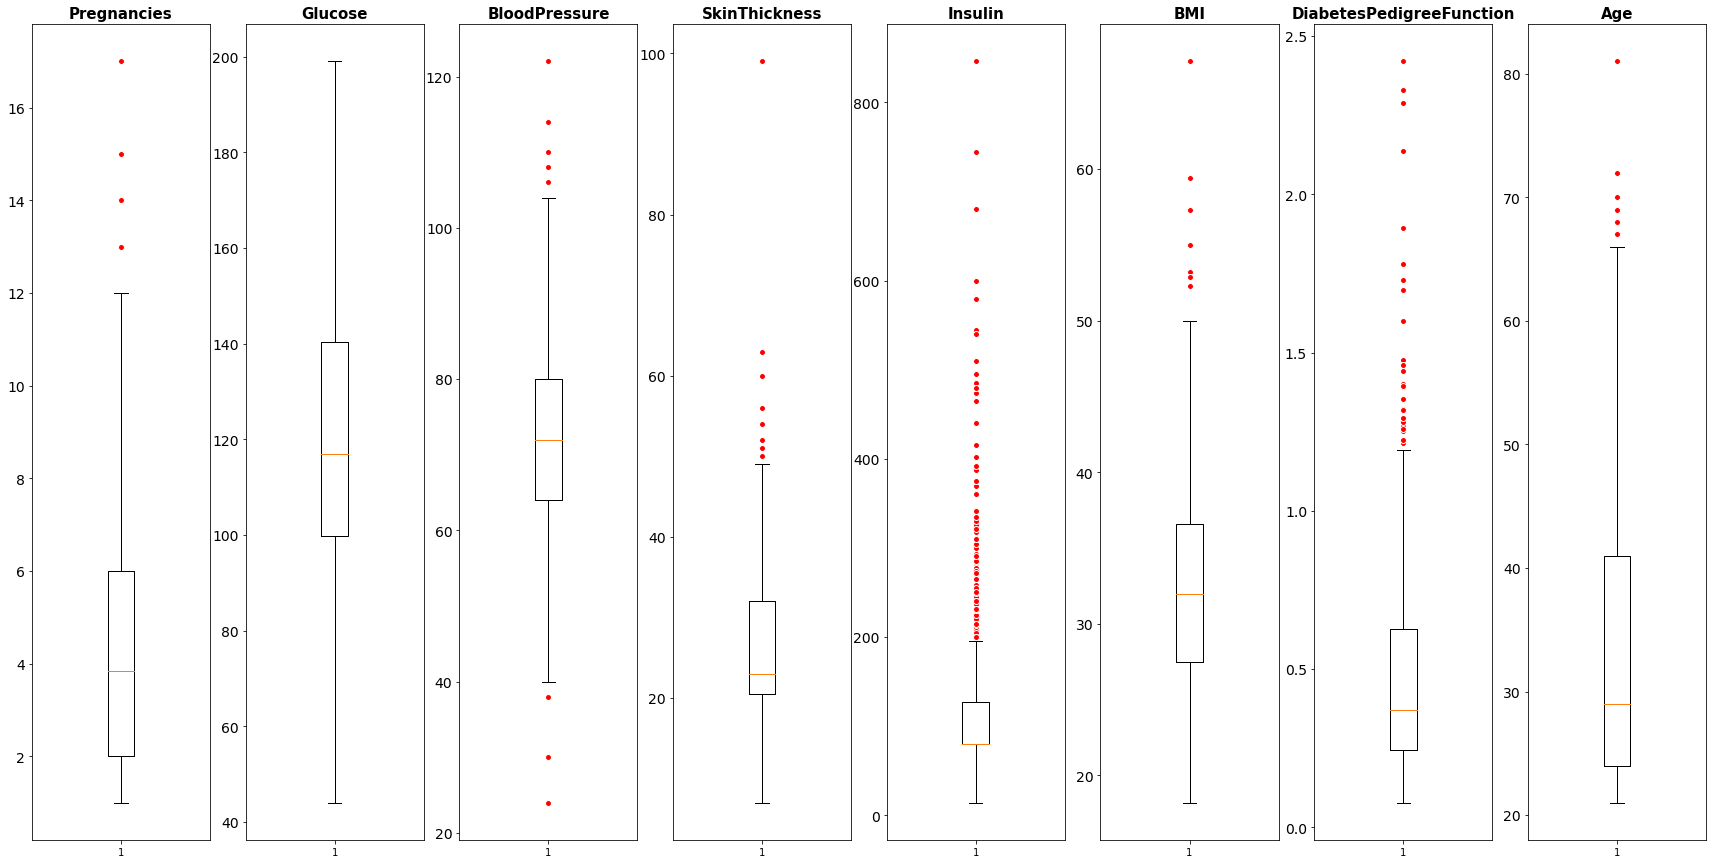

In [ ]:
#Identifying outlier data
import matplotlib.pyplot as plt 
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(30,15))

for i, ax in enumerate(axs.flat):
  ax.boxplot(df.iloc[:,i], flierprops=red_circle)
  ax.set_title(df.columns[i], fontsize=15, fontweight='bold')
  ax.tick_params(axis='y', labelsize=14)




In [ ]:
df = pd.read_csv(r'/content/diabetes.csv')
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = df[['Outcome']]

In [ ]:
from sklearn.model_selection import train_test_split #need to split data between training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
#LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print('Coeficient Values:')
print(model.coef_)

Coeficient Values:
[[ 2.12913965e-02  5.33326719e-03 -2.44840303e-03 -1.83650055e-04
   1.20019290e-04  1.25424952e-02  1.57202812e-01  3.19427229e-03]]


In [ ]:
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

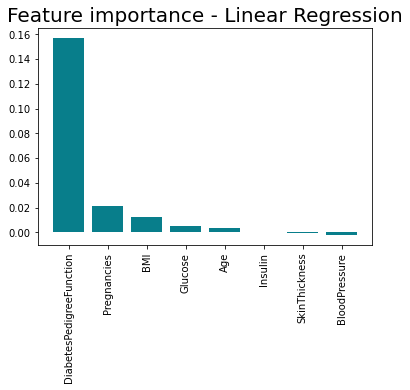

In [ ]:
#IMPORTANCE PLOT - LINEAR REGRESSION
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importance - Linear Regression', size=20)
plt.xticks(rotation='vertical')
plt.show()

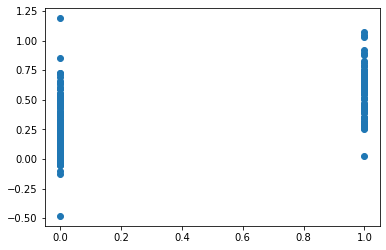

In [ ]:
#PLOT OF OUTCOMES - LINEAR REGRESSION
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

In [ ]:
#MEAN SQUARE ERROR
from sklearn import metrics
x = metrics.mean_squared_error(y_test, predictions)
print('Mean Square Error:')
print(x)
print('This mean square error tells us that we were fairly accurate in finding the line of best fit for our data')

Mean Square Error:
0.14945772983209696
This mean square error tells us that we were fairly accurate in finding the line of best fit for our data


In [ ]:
#LOGISTIC REGRESSION - MODEL
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=300)
model.fit(x_train, y_train.values.ravel())

LogisticRegression(max_iter=300)

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

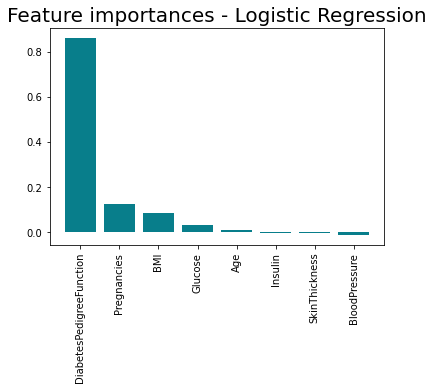

In [ ]:
#IMPORTANCE CHART - LOGISTIC REGRESSION
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature Importance - Logistic Regression', size=20)
plt.xticks(rotation='vertical')
plt.show()

Select Choose Files and select the .csv dataset file
Using y = b0 + b1*x, where x is diabetes pedigree function, y is outcome, b0 is [0.22508062] and b1 is [[0.28052416]]
y =  [0.22508062] + [[0.28052416]] *x
Mean Square Error is  0.21917105788284608


(0.0, 1.0)

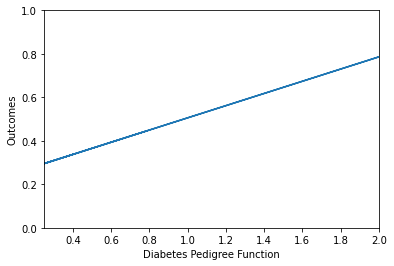

In [ ]:
#Linear Regression for most important elements
from sklearn.linear_model import LinearRegression #obtaining libraries and data file
from sklearn.model_selection import train_test_split #need to split data between training and testing
from sklearn import metrics
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files 
files.upload()
print("Select Choose Files and select the .csv dataset file")
df = pd.read_csv(r'diabetes.csv') #upload .csv file at runtime

x = df[['DiabetesPedigreeFunction']] #element is diabetes pedigree function
y = df[['Outcome']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) #splits data between 80% train and 20% test
model = LinearRegression()
model.fit(x_train,y_train)
b0 = model.intercept_
b1 = model.coef_
predictions = model.predict(x_test) #predicts and plots graph
print("Using y = b0 + b1*x, where x is diabetes pedigree function, y is outcome, b0 is", b0, "and b1 is", b1)
print ("y = ",b0,"+",b1,"*x")
mse = metrics.mean_squared_error(y_test, predictions)
print('Mean Square Error is ', mse)

plt.xlabel("Diabetes Pedigree Function") #labeling graph
plt.ylabel("Outcomes") 
plt.plot(x_test, predictions)
plt.xlim([0.25,2])
plt.ylim([0,1])


Using y = b0 + b1*x, where x is pregnancies, y is outcome, b0 is [0.23438553] and b1 is [[0.03060607]]
y =  [0.23438553] + [[0.03060607]] *x
Mean Square Error is  0.23705772639437214


(0.0, 1.0)

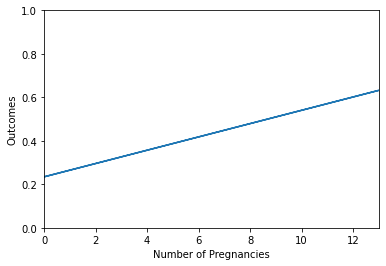

In [ ]:
x = df[['Pregnancies']] #Pregnancies is the element to be compared against the outcome
y = df[['Outcome']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) #splits data between 80% train and 20% test

model.fit(x_train,y_train)

b0 = model.intercept_
b1 = model.coef_

print("Using y = b0 + b1*x, where x is pregnancies, y is outcome, b0 is", b0, "and b1 is", b1)
print ("y = ",b0,"+",b1,"*x")
mse = metrics.mean_squared_error(y_test, predictions)
print('Mean Square Error is ', mse)

plt.xlabel("Number of Pregnancies") #labeling graph
plt.ylabel("Outcomes") 
predictions = model.predict(x_test) #predicts and plots graph
plt.plot(x_test, predictions)
plt.xlim([0,13])
plt.ylim([0,1])


Using y = b0 + b1*x, where x is BMI, y is outcome, b0 is [-0.17571753] and b1 is [[0.01607144]]
y =  [-0.17571753] + [[0.01607144]] *x
Mean Square Error is  0.266011890790351


(-0.32, 0.6)

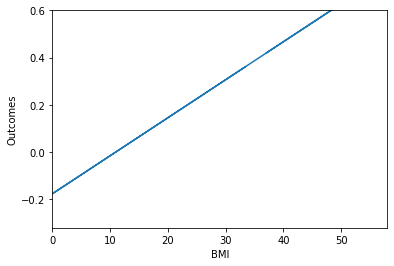

In [ ]:
x = df[['BMI']] #BMI is the element to be compared against the outcome
y = df[['Outcome']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) #splits data between 80% train and 20% test

model.fit(x_train,y_train)

b0 = model.intercept_
b1 = model.coef_

print("Using y = b0 + b1*x, where x is BMI, y is outcome, b0 is", b0, "and b1 is", b1)
print ("y = ",b0,"+",b1,"*x")
mse = metrics.mean_squared_error(y_test, predictions)
print('Mean Square Error is ', mse)

plt.xlabel("BMI") #labeling graph
plt.ylabel("Outcomes") 
predictions = model.predict(x_test) #predicts and plots graph
plt.plot(x_test, predictions)
plt.xlim([0,58])
plt.ylim([-0.32,0.6])

Using y = b0 + b1*x, where x is glucose, y is outcome, b0 is [-0.50994176] and b1 is [[0.00714972]]
y =  [-0.50994176] + [[0.00714972]] *x
Mean Square Error is  0.25460668182893337


(-0.8, 1.5)

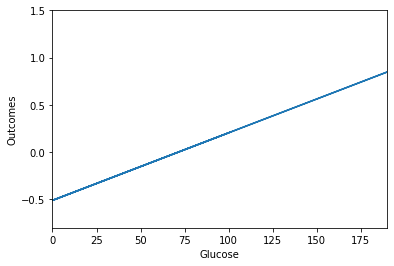

In [ ]:
x = df[['Glucose']] #Glucose is the element to be compared against the outcome
y = df[['Outcome']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) #splits data between 80% train and 20% test

model.fit(x_train,y_train)

b0 = model.intercept_
b1 = model.coef_

print("Using y = b0 + b1*x, where x is glucose, y is outcome, b0 is", b0, "and b1 is", b1)
print ("y = ",b0,"+",b1,"*x")
mse = metrics.mean_squared_error(y_test, predictions)
print('Mean Square Error is ', mse)

plt.xlabel("Glucose") #labeling graph
plt.ylabel("Outcomes") 
predictions = model.predict(x_test) #predicts and plots graph
plt.plot(x_test, predictions)
plt.xlim([0,190])
plt.ylim([-0.8,1.5])